In [1]:
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
	
# Set such that PDF fonts export in a manner that they
# are editable in illustrator/affinity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# set to define axes linewidths
matplotlib.rcParams['axes.linewidth'] = 0.5

# this defines some prefactors so inline figures look nice
# on a retina macbook. These can be commented out without any
# issue and are solely asthetic.
%matplotlib inline
%config InlineBackend.figure_format='retina'

# UPDATE 2020-12-31 (my preferred font is Avenir...)
font = {'family' : 'avenir',
    	'weight' : 'normal'}

matplotlib.rc('font', **font)
from scipy.signal import savgol_filter
import protfasta
from sparrow import Protein


### Load data
Read in all the data we're going to use for compositional analysis

In [2]:
viable = protfasta.read_fasta('data/viable_2025.fasta',return_list=True)
inviable = protfasta.read_fasta('data/inviable_2025.fasta', return_list=True)

viable_dict = protfasta.read_fasta('data/viable_2025.fasta')
inviable_dict = protfasta.read_fasta('data/inviable_2025.fasta')



In [3]:
# Define residue sets and define two functions that compute the score
RES_hydro = ['Y','W','F','M','V','I','L','A','P']
RES_charge = ['D','E','K','R']

scores = {'Y':1.5,
          'W':2.,
          'F':1,
          'M':1.00,
          'I':0.75,
          'V':0.5,
          'L':0.25,
          'A':0,
          'N':0.0,
          'Q':0.0,
          'G':0.0,
          'H':0.0,
          'K':+0.5,
          'R':+0.5,
          'P':-2.5,
          'E':-1,
          'D':-1}
          

def charge_score(sequence):
    s = 0
    f = Protein(sequence).amino_acid_fractions
    for i in RES_charge:
        s = s + f[i]*scores[i]
        
    return s

def hydroscore(sequence):
    s = 0
    f = Protein(sequence).amino_acid_fractions
    for i in RES_hydro:
        s = s + f[i]*scores[i]
        
    return s



44
40
Total sequences plotted: 66


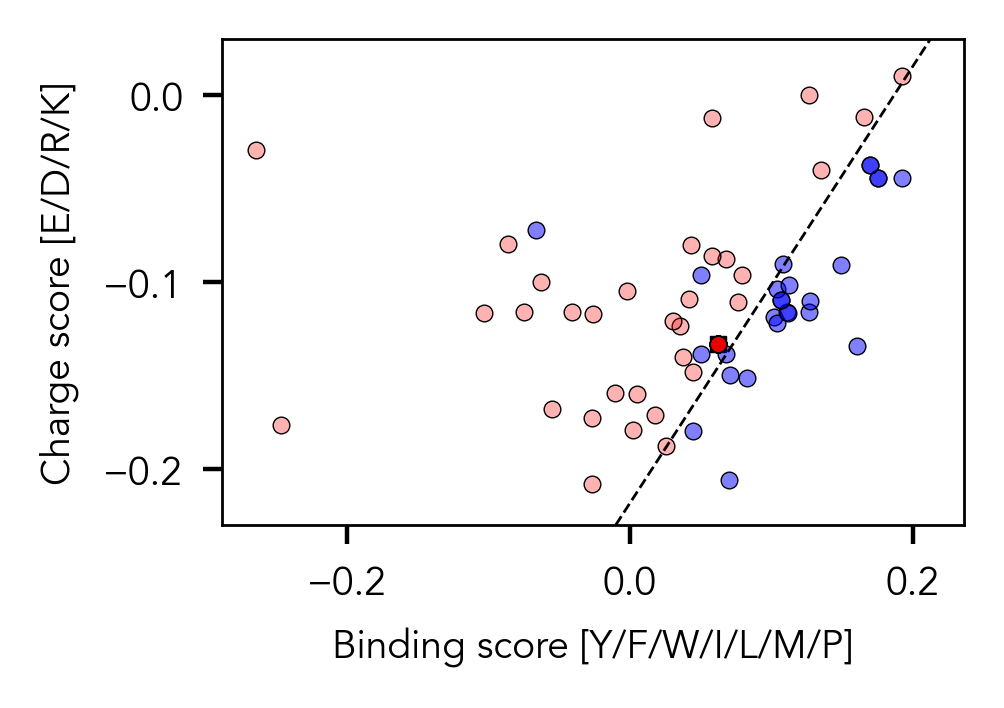

In [5]:

scale=0.93
figure(num=None, figsize=(2.8*scale, 2.0*scale), dpi=200, facecolor='w', edgecolor='k')
#figure(num=None, figsize=(5,4), dpi=200, facecolor='w', edgecolor='k')

MARKERSIZE=3
print(len(viable))
print(len(inviable))

# [viable, motif, binding score, charge score, sequence] 
out_data = {}

show_motifs = False
seq_count = 0
for x in viable:
    
    # if we get the WT sequence
    if x[0] == 'WT_IDR2 [VIABLE] _M':         
        
        plt.plot(hydroscore(x[1]), charge_score(x[1]), 'sk', alpha=1, mew=0, ms=MARKERSIZE)
        plt.plot(hydroscore(x[1]), charge_score(x[1]), 's', color='None', mew=0.25,mec='k', ms=MARKERSIZE)
        seq_count += 1
        out_data[x[0]] = [1, 1, hydroscore(x[1]), charge_score(x[1]), x[1]]
        
        
    # if the sequence has a likely motif
    if x[0][-2:] == '_M':
        if show_motifs:
            plt.plot(hydroscore(x[1]), charge_score(x[1]), 'sb', alpha=0.5, mew=0, ms=MARKERSIZE)
            plt.plot(hydroscore(x[1]), charge_score(x[1]), 's', color='None', mew=0.25,mec='k', ms=MARKERSIZE)
            seq_count += 1
            out_data[x[0]] = [1, 1, hydroscore(x[1]), charge_score(x[1]), x[1]]
        else:
            pass

        
        
    else:
        
        plt.plot(hydroscore(x[1]), charge_score(x[1]), 'ob', alpha=0.5, mew=0, ms=MARKERSIZE)
        plt.plot(hydroscore(x[1]), charge_score(x[1]), 'o', color='None', mew=0.25,mec='k', ms=MARKERSIZE)
        seq_count += 1
        out_data[x[0]] = [1, 0, hydroscore(x[1]), charge_score(x[1]), x[1]]

        # uncomment to label the points
        #if hydroscore(x[1]) < 0.055:
        #    plt.text(hydroscore(x[1]), charge_score(x[1]), x[0], fontsize=4, color='k', alpha=0.5)


for x in inviable:
    if x[0][-2:] == '_M':
        if show_motifs:
            plt.plot(hydroscore(x[1]), charge_score(x[1]), 'sr', alpha=0.3, mew=0, ms=MARKERSIZE)
            plt.plot(hydroscore(x[1]), charge_score(x[1]), 's', color='None', mew=0.25,mec='k',ms=MARKERSIZE)
            seq_count += 1
            out_data[x[0]] = [0, 1, hydroscore(x[1]), charge_score(x[1]), x[1]]
        else:
            pass

    else:
        
        plt.plot(hydroscore(x[1]), charge_score(x[1]), 'or', alpha=0.3, mew=0, ms=MARKERSIZE)
        plt.plot(hydroscore(x[1]), charge_score(x[1]), 'o', color='None', mew=0.25,mec='k', ms=MARKERSIZE)        
        seq_count += 1
        out_data[x[0]] = [0, 0, hydroscore(x[1]), charge_score(x[1]), x[1]]
        #plt.text(hydroscore(x[1]), charge_score(x[1]), x[0], fontsize=4)



plt.xlabel('Binding score [Y/F/W/I/L/M/P]',fontsize=7)
plt.ylabel('Charge score [E/D/R/K]',fontsize=7)
plt.yticks(fontsize=7)
plt.xticks(fontsize=7)
#plt.xlim([0,0.15])

ylim=[-0.23, 0.03]
plt.plot([-0.01,0.2125],[ylim[0],ylim[1]],'--k',linewidth=0.5)
plt.ylim([ylim[0],ylim[1]])
plt.tight_layout()

if show_motifs:
    plt.savefig('figures/function_space2025_motifs.pdf')
else:
    plt.savefig('figures/function_space2025.pdf')
    
#plt.xlim([-0.1,0.2])
#plt.savefig('figures/function_space_zoom.pdf')
print(f'Total sequences plotted: {seq_count}')


In [6]:
with open('data/output_fig4i_data.csv','w') as fh:
    fh.write('Name, Viable (y/n), Motif (y/n), binding_score, charge_score, sequence\n')
    for k in out_data:
        name_no_comma = k.replace(',','-')        
        fh.write(f"{name_no_comma}, {out_data[k][0]}, {out_data[k][1]}, {round(out_data[k][2],3)}, {round(out_data[k][3],3)}, {out_data[k][4]}\n")
        
